In [1]:
import numpy as np
import json
import codecs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from model import my_aggclustering
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
msdat_dir = '/home/hpms/Microsoft.IoT-Dump1.json'
with codecs.open(msdat_dir, 'r', 'utf-8-sig') as f:
    msdat = json.load(f)
msdat = pd.DataFrame(msdat)
msdat['Commands'] = [tuple(session) for session in msdat['Commands']]
msdat = msdat.drop_duplicates(subset='Commands').reset_index(drop=True)  # drop duplicates
msdat['Commands'] = [list(session) for session in msdat['Commands']]
msdat['Commands Length'] = [len(session) for session in msdat['Commands']]
msdat = msdat.sort_values(by='FirstSeen').reset_index(drop=True)

### Baseline

alpha_cluster = 0.1

cluster_threshold = $-\infty$

alpha_label = 0.1

init_commands_num = 1

seq_len = 12

In [3]:
alpha_cluster = 0.1
cluster_threshold = -np.inf
alpha_label = 0.1
init_commands_num = 1
seq_len = 12

In [3]:
# my_agg = my_aggclustering(msdat, alpha_cluster, cluster_threshold, alpha_label, init_commands_num, seq_len)
# memory = my_agg.fit()
# with open('agg_data/aggclustering_baseline.pkl', 'wb') as f:
#     pickle.dump(my_agg, f, protocol=4)

Clustering started. Total 1804 clusters. Clustering finished. Time spent: 91.01s.


In [4]:
with open('agg_data/aggclustering_baseline.pkl', 'rb') as f:
    my_agg = pickle.load(f)
clustering = my_agg.memory['clustering']
init_commands_list = my_agg.memory['init_commands_list']
posterior_dict = my_agg.memory['posterior_dict']
expected_predictive_prob = my_agg.memory['expected_predictive_prob']
A = my_agg.memory['A']
E = my_agg.memory['E']
seq_rank_list = my_agg.memory['seq_rank_list']
weights = my_agg.memory['weights']

In [7]:
sorted_w = sorted(weights.items(), key=lambda item: item[1], reverse=True)
x = [w[0] for w in sorted_w]
y = [expected_predictive_prob[x_i] for x_i in x]

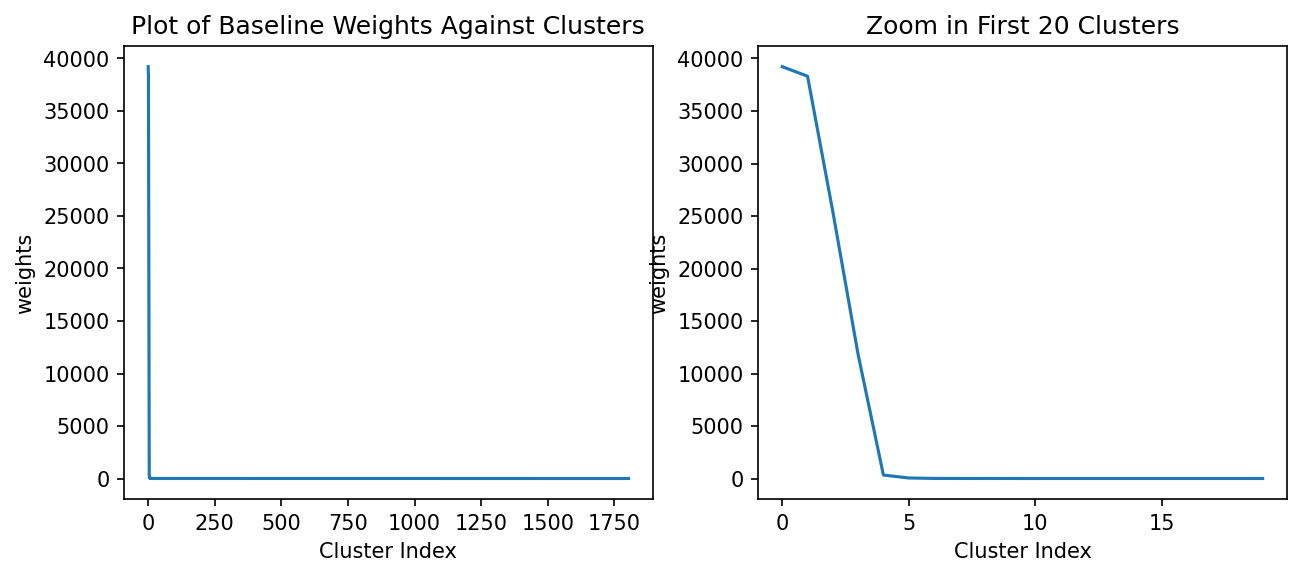

In [18]:
zoom = 20
fig, ax = plt.subplots(1,2,figsize=(10,4),dpi=150)
w = [cw[1] for cw in sorted_w]
sns.lineplot(x = [i for i in range(len(w))], y = w,ax=ax[0])
ax[0].set(title='Plot of Baseline Weights Against Clusters',
          xlabel='Cluster Index',
          ylabel='weights')
sns.lineplot(x = [i for i in range(zoom)], y = w[:zoom],ax=ax[1])
ax[1].set(title='Zoom in First {} Clusters'.format(zoom),
          xlabel='Cluster Index',
          ylabel='weights')
plt.show()

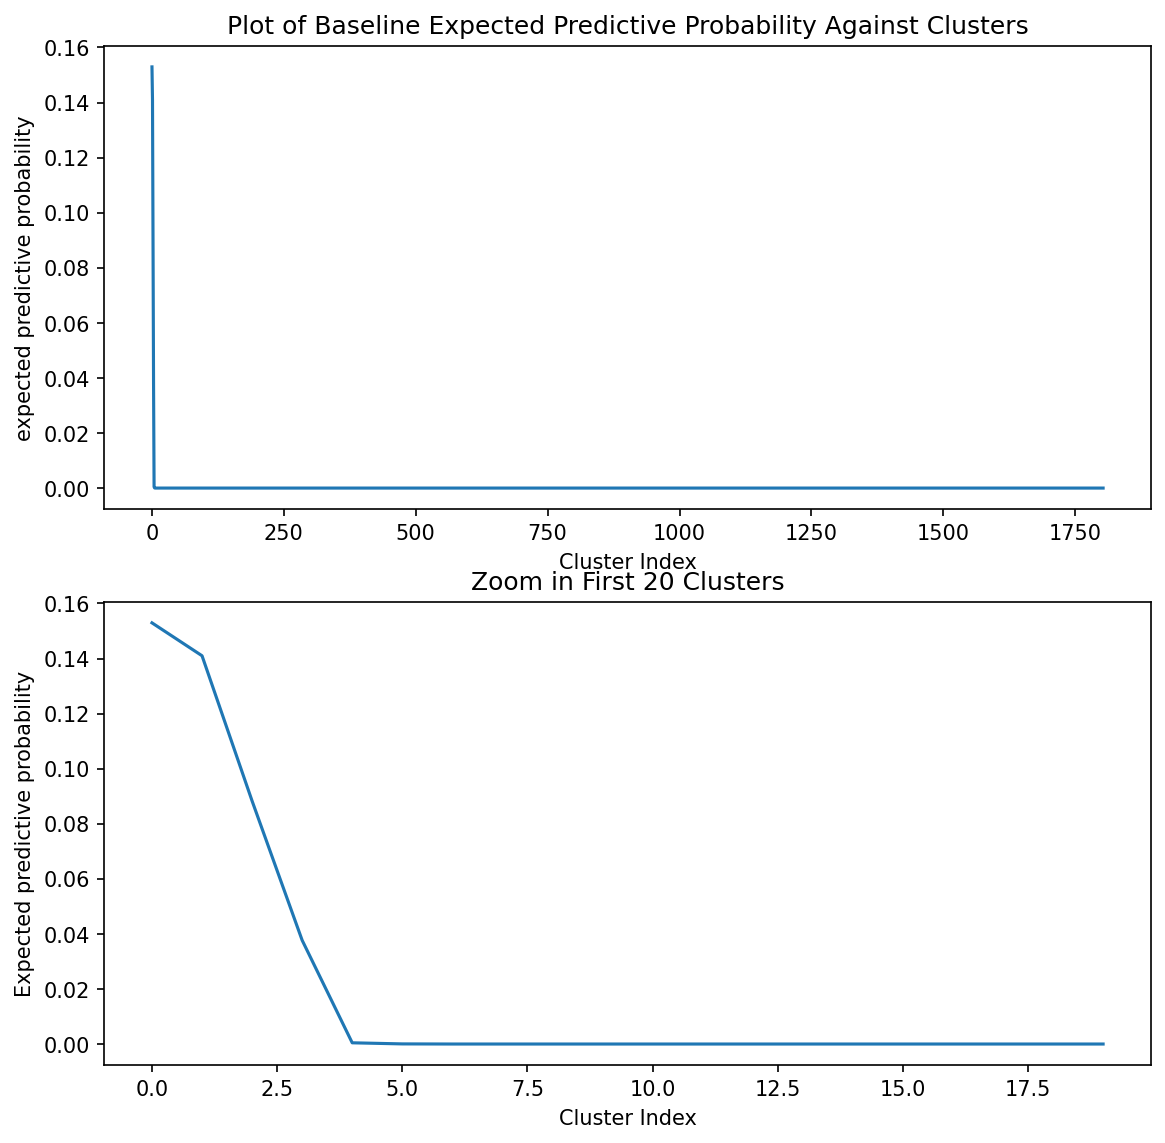

In [24]:
zoom = 20
fig, ax = plt.subplots(2, 1, figsize=(9,9), dpi=150)
sns.lineplot(x = [i for i in range(len(y))], y = y,ax=ax[0])
ax[0].set(title='Plot of Baseline Expected Predictive Probability Against Clusters',
          xlabel='Cluster Index',
          ylabel='expected predictive probability'
         )
sns.lineplot(x = [i for i in range(zoom)], y = y[:zoom],ax=ax[1])
ax[1].set(title='Zoom in First {} Clusters'.format(zoom),
          xlabel='Cluster Index',
          ylabel='Expected predictive probability'
         )
plt.show()

#### Comments

There are 3 very large clusters in Baseline. This makes expected predictive probabilities very small for the other clusters.

### Different number of initial commands

alpha_cluster = 0.1 

alpha_label = 0.1

cluster_threshold = -0.1

init_commands_num = 1/2/3/4/5/6/7/8

seq_len = 12

In [3]:
alpha_cluster = 0.1
cluster_threshold = -0.1
alpha_label = 0.1
seq_len = 12

In [7]:
# for init_commands_num in range(1,9):
#     my_agg = my_aggclustering(msdat, alpha_cluster, cluster_threshold, alpha_label, init_commands_num, seq_len)
#     my_agg.fit()
#     with open('agg_data/aggclustering_{}init.pkl'.format(init_commands_num), 'wb') as f:
#         pickle.dump(my_agg, f, protocol=4)

Clustering started. Total 16 clusters. Clustering finished. Time spent: 80.02s.
Clustering started. Total 35 clusters. Clustering finished. Time spent: 1444.75s.
Clustering started. Total 34 clusters. Clustering finished. Time spent: 3535.67s.
Clustering started. Total 30 clusters. Clustering finished. Time spent: 6126.17s.
Clustering started. Total 34 clusters. Clustering finished. Time spent: 6876.06s.
Clustering started. Total 33 clusters. Clustering finished. Time spent: 14343.67s.
Clustering started. Total 37 clusters. Clustering finished. Time spent: 20463.11s.
Clustering started. Total 37 clusters. Clustering finished. Time spent: 17477.99s.


In [8]:
sorted_ws = []
xs = []
ys = []

for init_commands_num in range(1,9):
    with open('agg_data/aggclustering_{}init.pkl'.format(init_commands_num), 'rb') as f:
        my_agg = pickle.load(f)
    expected_predictive_prob = my_agg.memory['expected_predictive_prob']
    weights = my_agg.memory['weights']
    
    sorted_ws.append(sorted(weights.items(), key=lambda item: item[1], reverse=True))
    xs.append([w[0] for w in sorted_ws[-1]])
    ys.append([expected_predictive_prob[x_i] for x_i in xs[-1]])

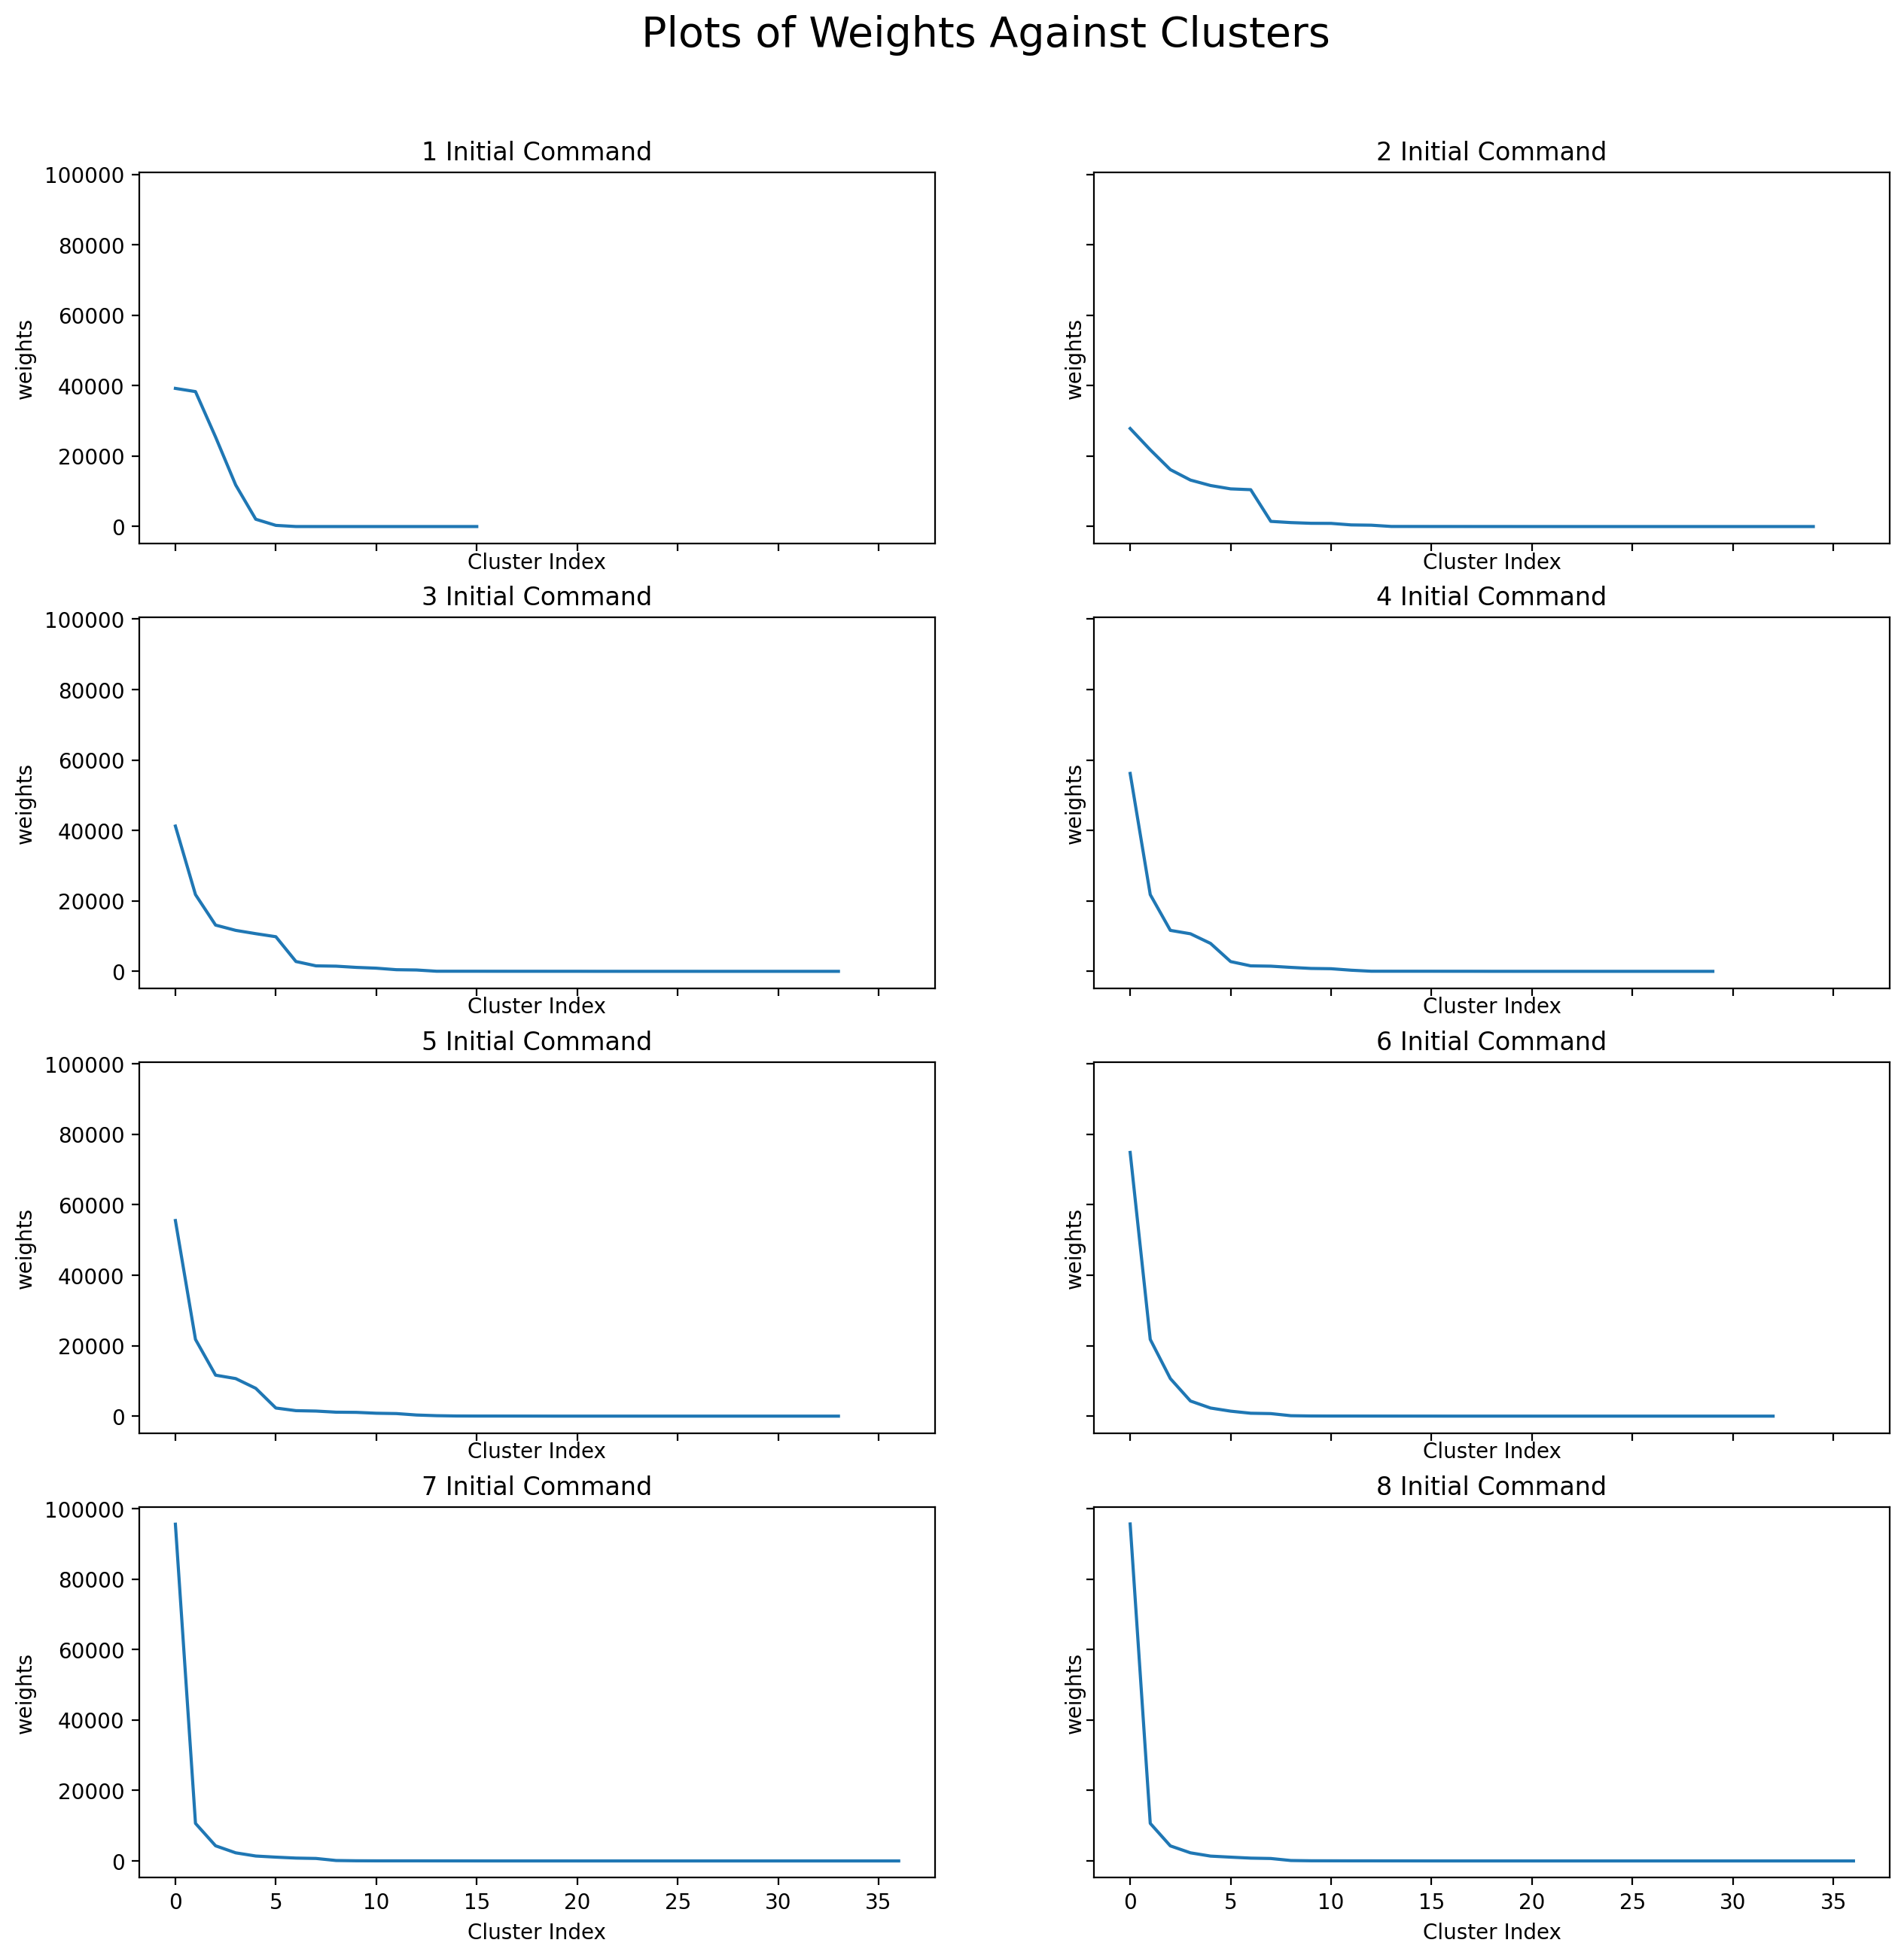

In [13]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for init_commands_num in range(1, 9):
    w = [cw[1] for cw in sorted_ws[init_commands_num-1]]
    sns.lineplot(x = [i for i in range(len(w))], y = w,ax=ax[(init_commands_num-1)//2, (init_commands_num-1)%2])
    ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set(title='{} Initial Command'.format(init_commands_num),
                                                              xlabel='Cluster Index',
                                                              ylabel='weights'
                                                             )
    fig.suptitle('Plots of Weights Against Clusters',\
                 y = 0.95, fontsize=20
                )
plt.show()

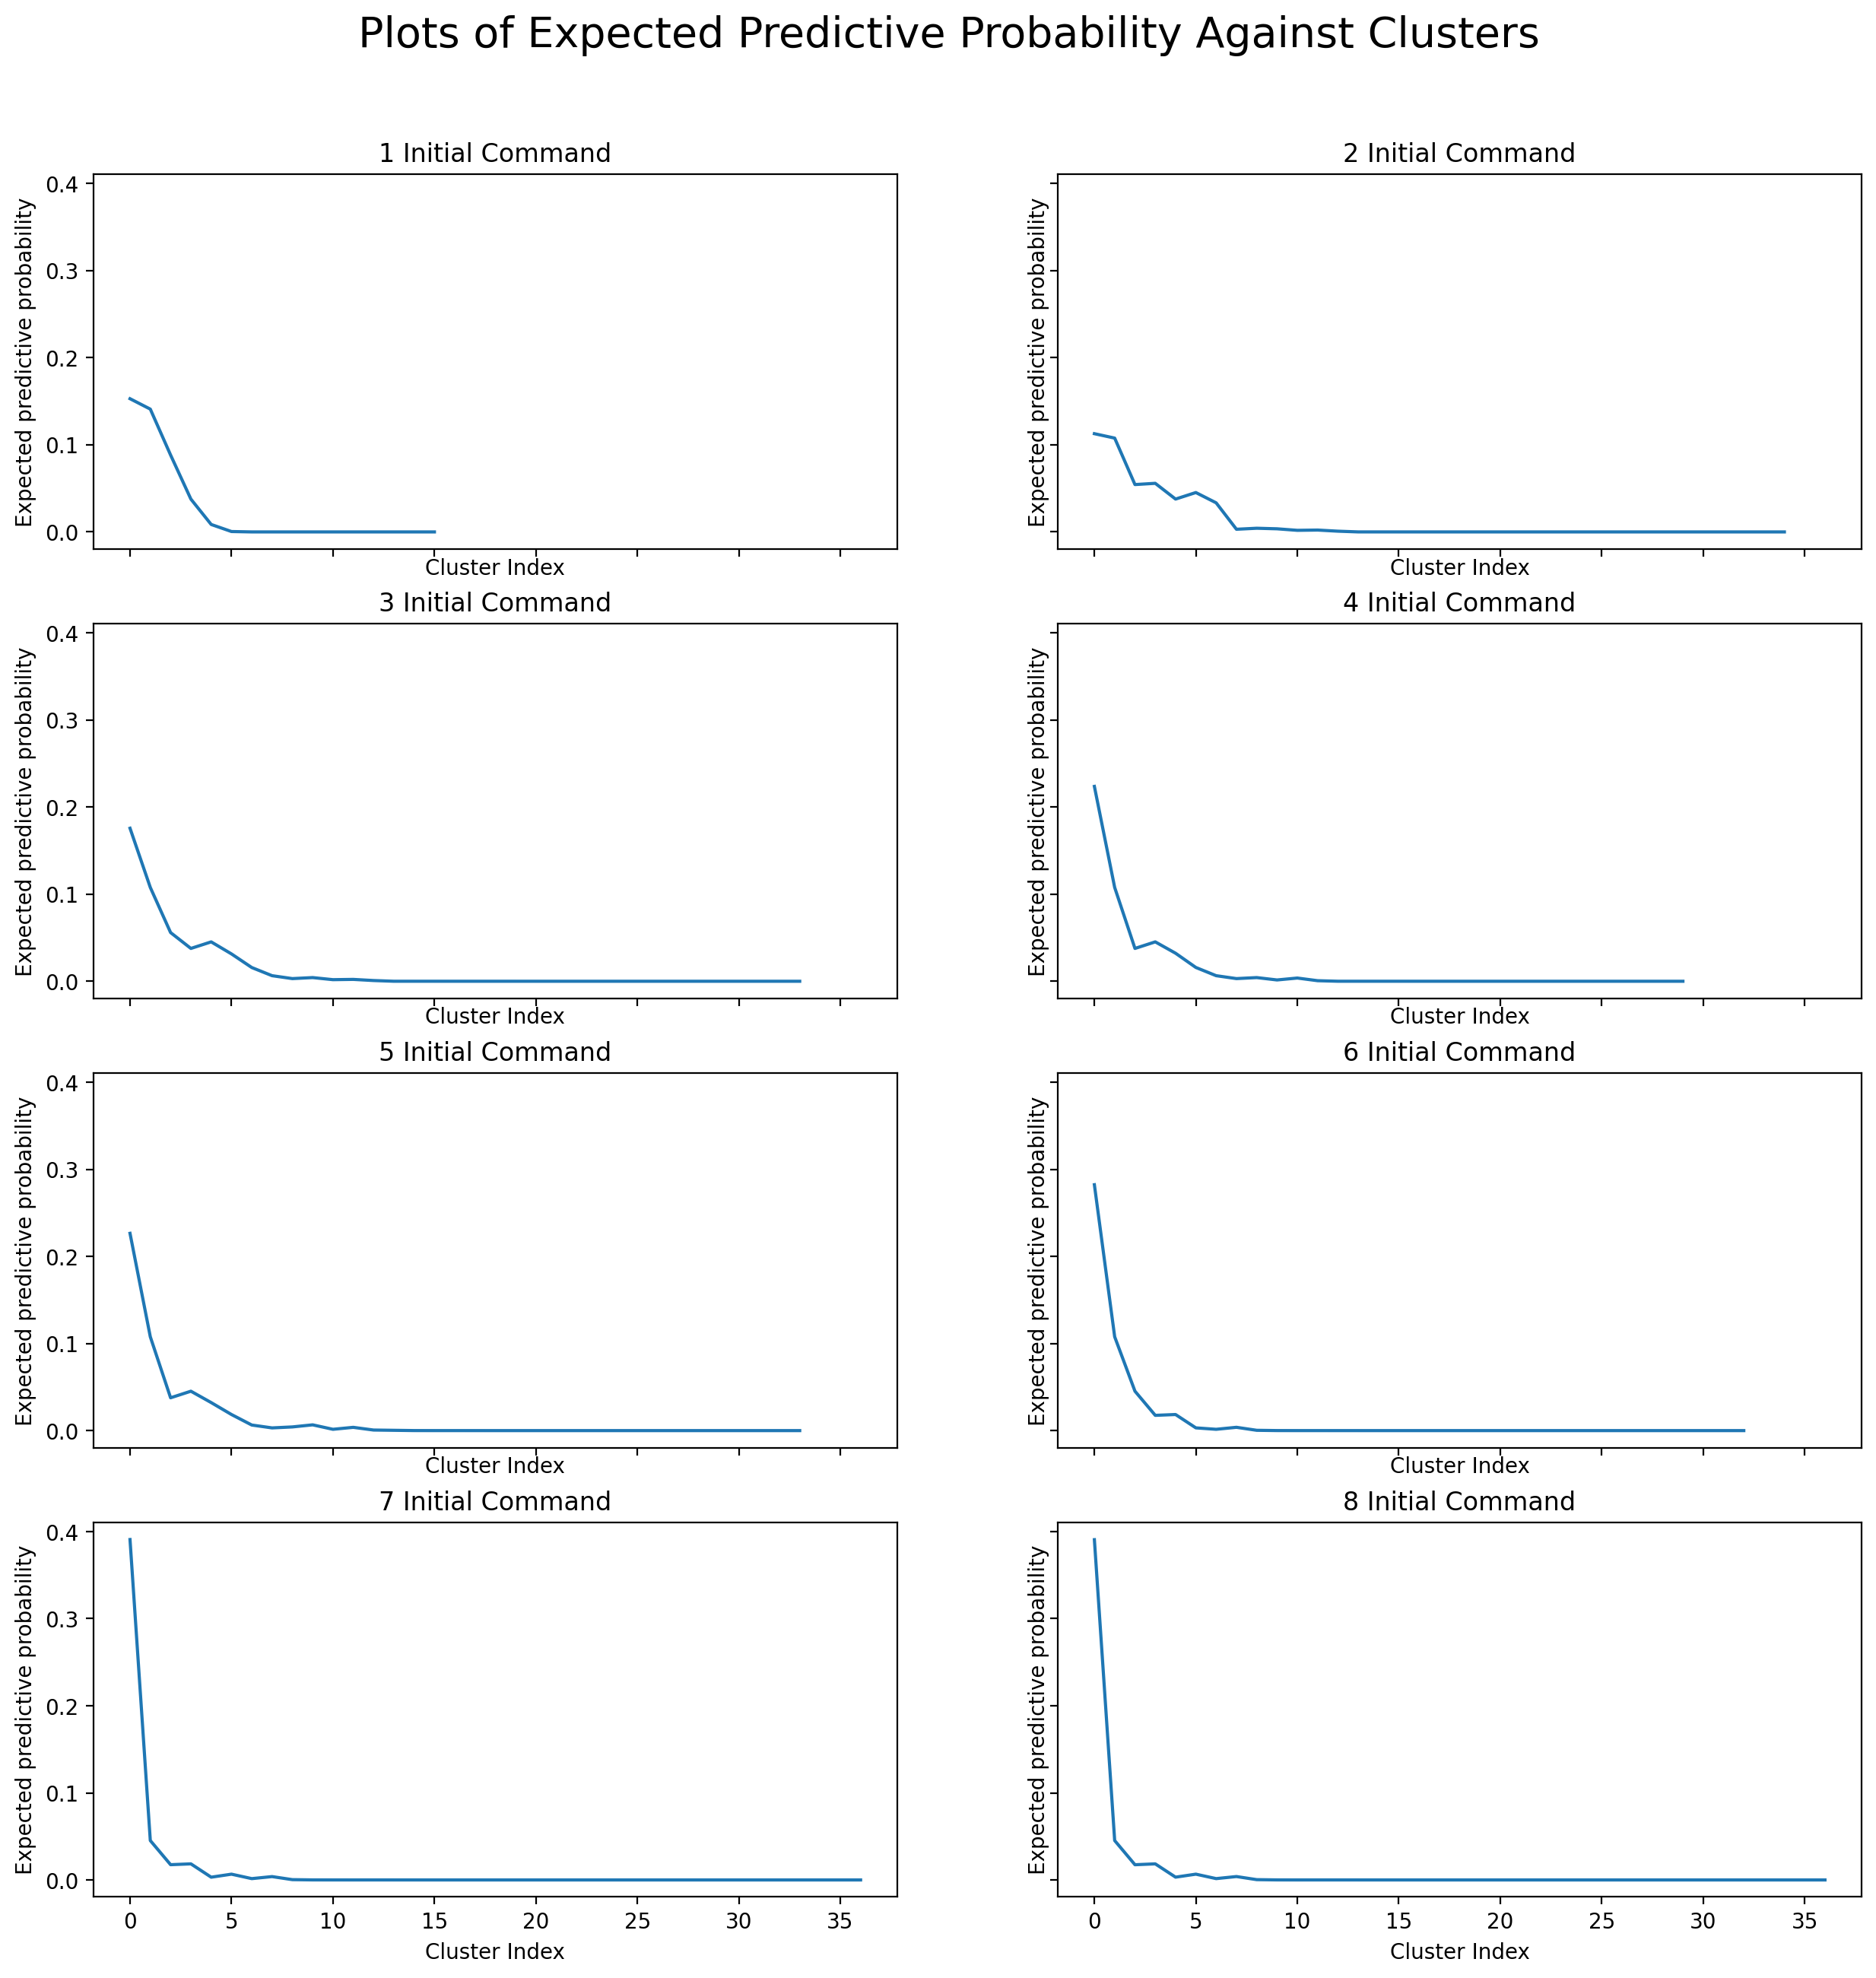

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for init_commands_num in range(1, 9):
    y = ys[init_commands_num-1]
    sns.lineplot(x = [i for i in range(len(y))], y = y,ax=ax[(init_commands_num-1)//2, (init_commands_num-1)%2])
    ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set(title='{} Initial Command'.format(init_commands_num),
                                                              xlabel='Cluster Index',
                                                              ylabel='Expected predictive probability'
                                                             )
    fig.suptitle('Plots of Expected Predictive Probability Against Clusters',\
                 y = 0.95, fontsize=20
                )
plt.show()

In [12]:
# zoom_prob = 0.00025
# fig, ax = plt.subplots(4, 2, figsize=(15,10), dpi=200)
# for init_commands_num in range(1, 9):
#     y = ys[init_commands_num-1]
#     ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set_ylim(0, zoom_prob)
#     sns.lineplot(x = [i for i in range(len(y))], y = y,ax=ax[(init_commands_num-1)//2, (init_commands_num-1)%2])
#     ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set(title='{} Initial Command'.format(init_commands_num),
#                                                               xlabel='Cluster Index',
#                                                               ylabel='Expected predictive probability'
#                                                              )
# plt.show()

#### Comments

The weights for the first three plots looks fine. However, starting from the fourth plot, one cluster becomes more and more dominant and severely affects the expected predictive probabilities of the other clusters.

### Find Optimal Distance Threshold for Clustering

alpha_cluster = 0.1 

alpha_label = 0.1

init_commands_num = 1/2/3/4/5/6/7/8

seq_len = 12

In [3]:
alpha_cluster = 0.1
cluster_threshold = -0.1
alpha_label = 0.1
seq_len = 12

In [6]:
for init_commands_num in range(1,9):
    start_time = time.time()
    print('{} initial commands started.'.format(init_commands_num), end=' ')
    with open('agg_data/aggclustering_{}init.pkl'.format(init_commands_num), 'rb') as f:
        my_agg = pickle.load(f)
        A = my_agg.memory['A']
        E = my_agg.memory['E']
        seq_rank_list = my_agg.memory['seq_rank_list']
        init_commands_list = my_agg.memory['init_commands_list']
    optim_ct = 0
    optim_sum_prob = 0
    optim_memory=0
    for ct in np.arange(-0.05, -0.51, -0.05):
        my_agg = my_aggclustering(msdat, alpha_cluster, ct, alpha_label, init_commands_num, seq_len)
        memory = my_agg.fit(A, init_commands_list, seq_rank_list, E, full_memory=False, verbose=False)
        prob_list = sorted(list(memory['expected_predictive_prob'].values()), reverse=True)
        if np.sum(prob_list[0:10])>optim_sum_prob:
            optim_ct = ct
            optim_memory = memory
            optim_sum_prob = np.sum(prob_list[0:10])
    with open('agg_data/aggclustering_{}init_optimct.pkl'.format(init_commands_num), 'wb') as f:
        pickle.dump((optim_ct, optim_memory), f, protocol=4)
    print('Finished! Time spent {:.2f}s. Optimal threshold: {:.2f}.'.format(time.time()-start_time, optim_ct))

1 initial commands started. Finished! Time spent 13.78s. Optimal threshold: -0.40.
2 initial commands started. Finished! Time spent 65.95s. Optimal threshold: -0.25.
3 initial commands started. Finished! Time spent 124.87s. Optimal threshold: -0.40.
4 initial commands started. Finished! Time spent 197.05s. Optimal threshold: -0.10.
5 initial commands started. Finished! Time spent 220.91s. Optimal threshold: -0.10.
6 initial commands started. Finished! Time spent 482.45s. Optimal threshold: -0.40.
7 initial commands started. Finished! Time spent 720.71s. Optimal threshold: -0.15.
8 initial commands started. Finished! Time spent 956.67s. Optimal threshold: -0.15.


In [9]:
sorted_ws = []
xs = []
ys = []
for init_commands_num in range(1,9):
    with open('agg_data/aggclustering_{}init_optimct.pkl'.format(init_commands_num), 'rb') as f:
        optim_ct, optim_memory = pickle.load(f)
    expected_predictive_prob = optim_memory['expected_predictive_prob']
    weights = optim_memory['weights']
    
    sorted_ws.append(sorted(weights.items(), key=lambda item: item[1], reverse=True))
    xs.append([w[0] for w in sorted_ws[-1]])
    ys.append([expected_predictive_prob[x_i] for x_i in xs[-1]])

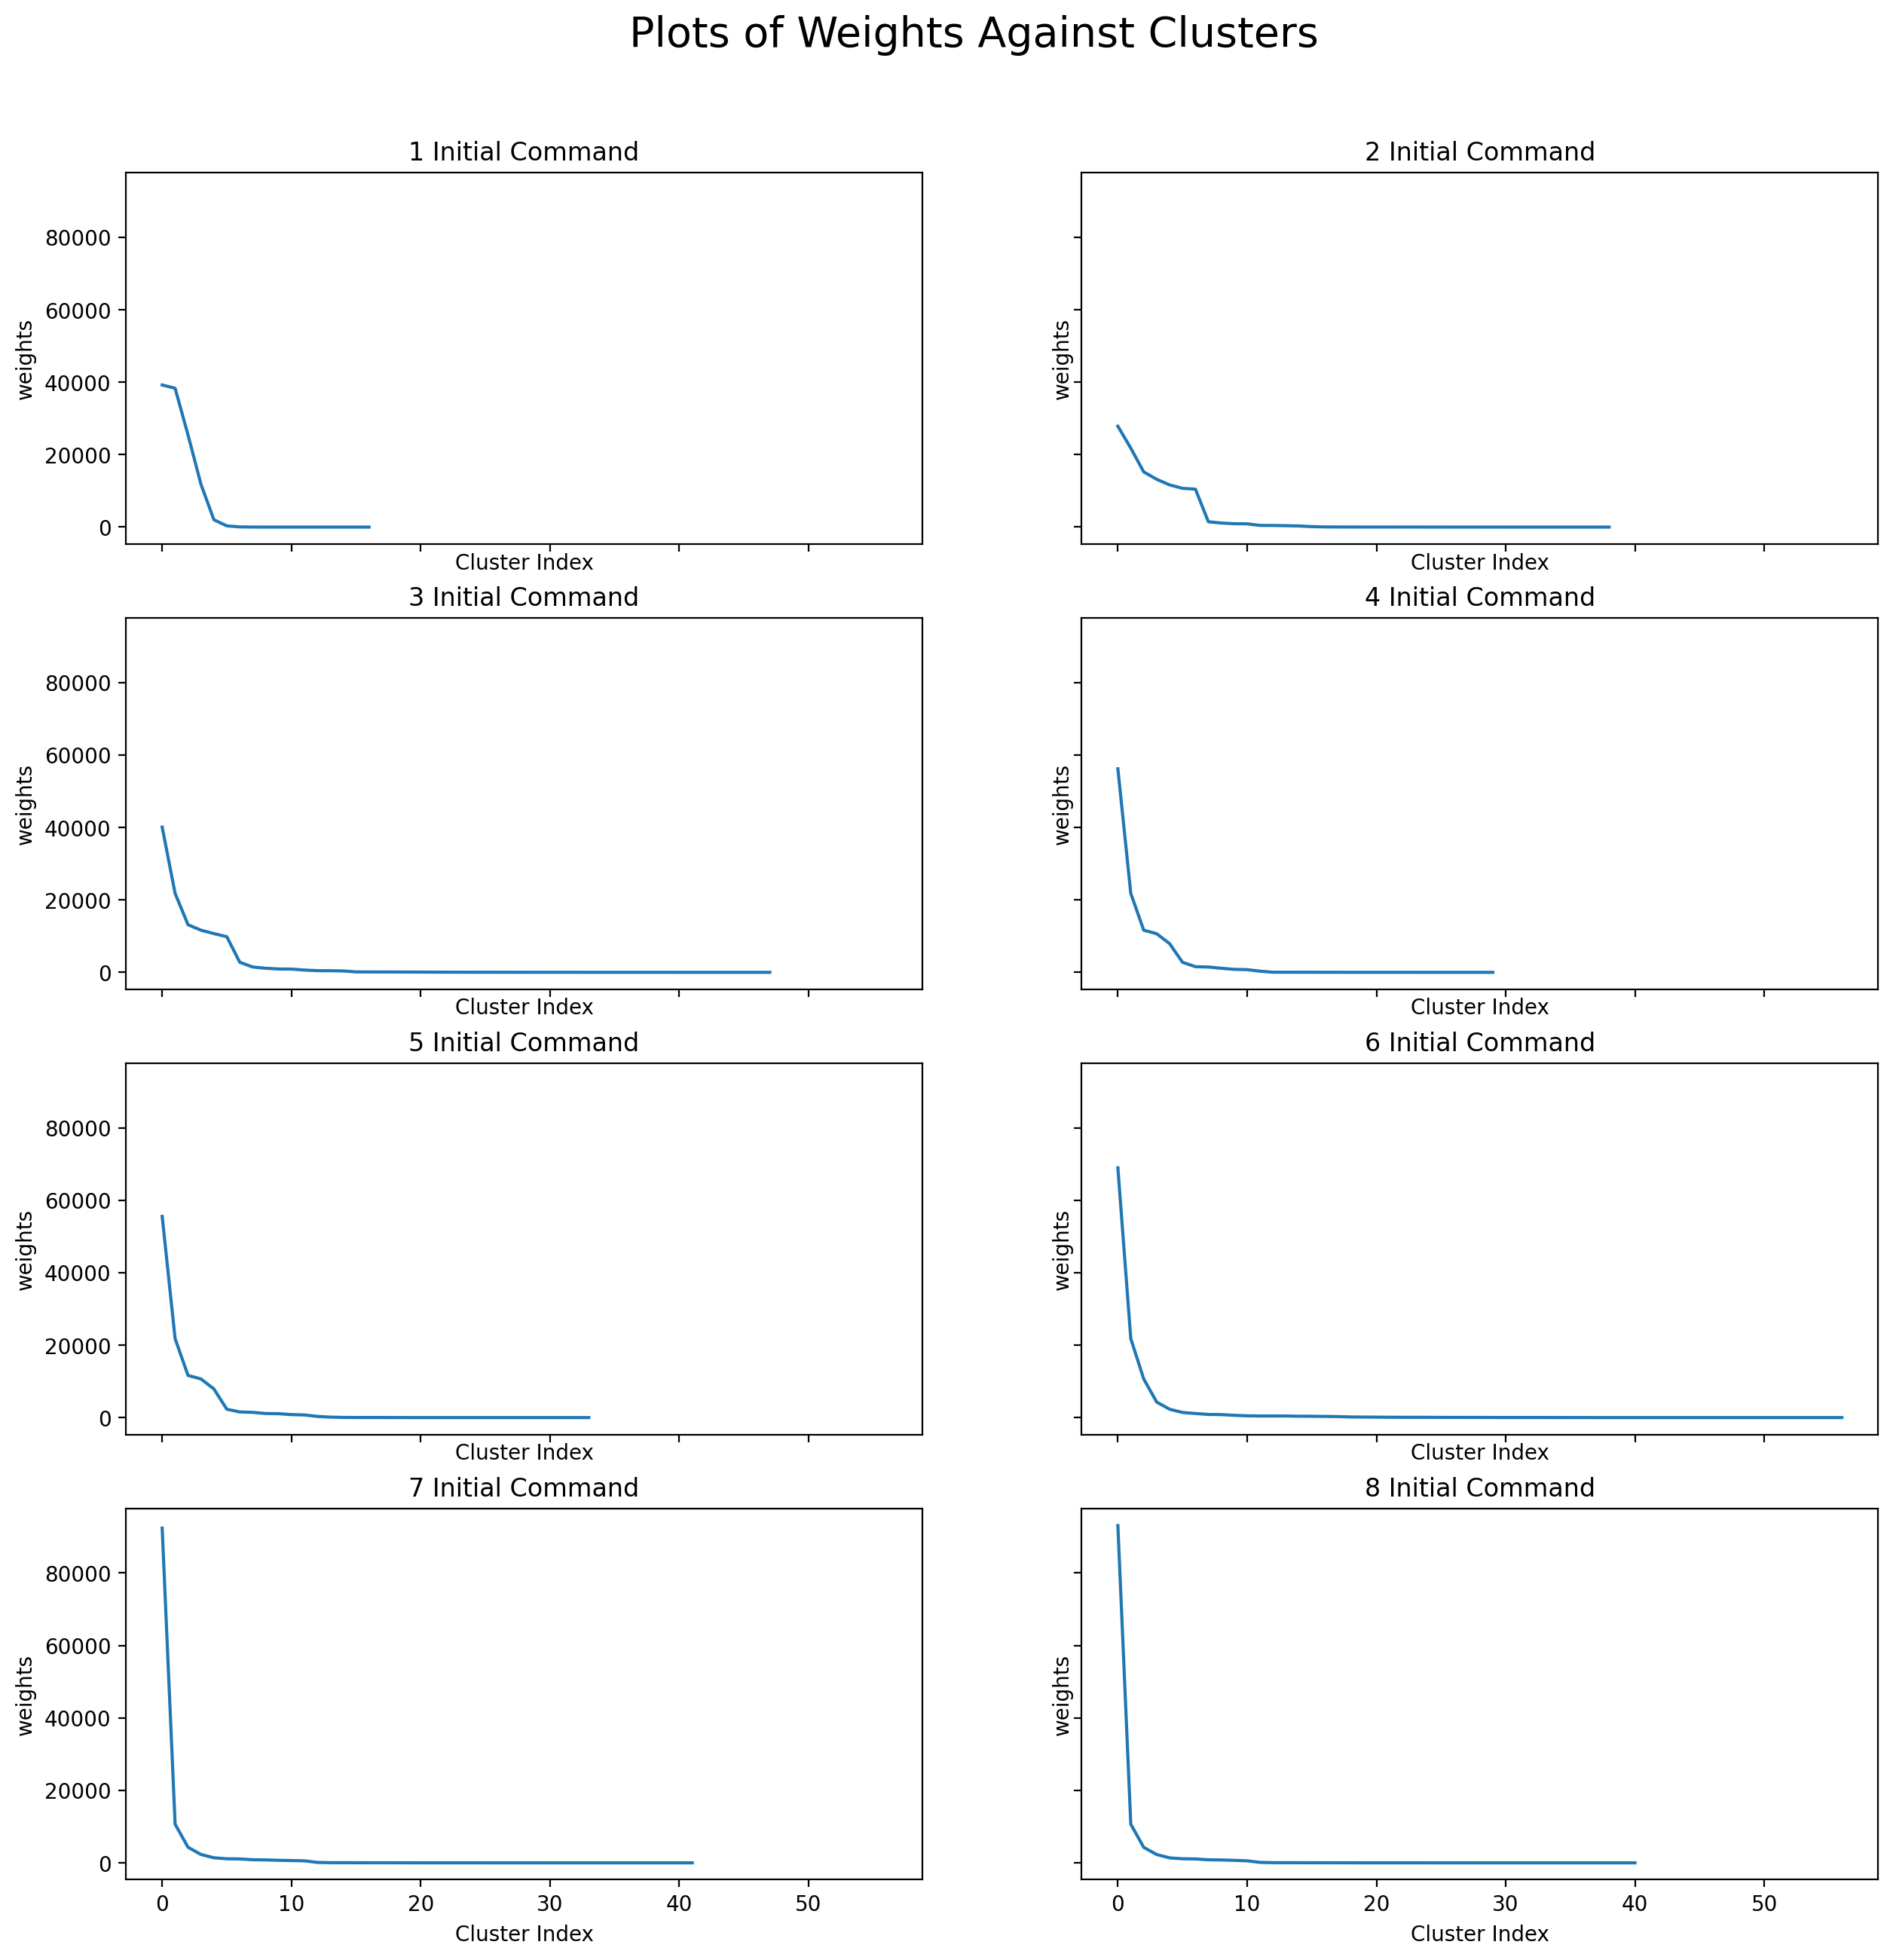

In [10]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for init_commands_num in range(1, 9):
    w = [cw[1] for cw in sorted_ws[init_commands_num-1]]
    sns.lineplot(x = [i for i in range(len(w))], y = w,ax=ax[(init_commands_num-1)//2, (init_commands_num-1)%2])
    ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set(title='{} Initial Command'.format(init_commands_num),
                                                              xlabel='Cluster Index',
                                                              ylabel='weights'
                                                             )
    fig.suptitle('Plots of Weights Against Clusters',\
                 y = 0.95, fontsize=20
                )
plt.show()

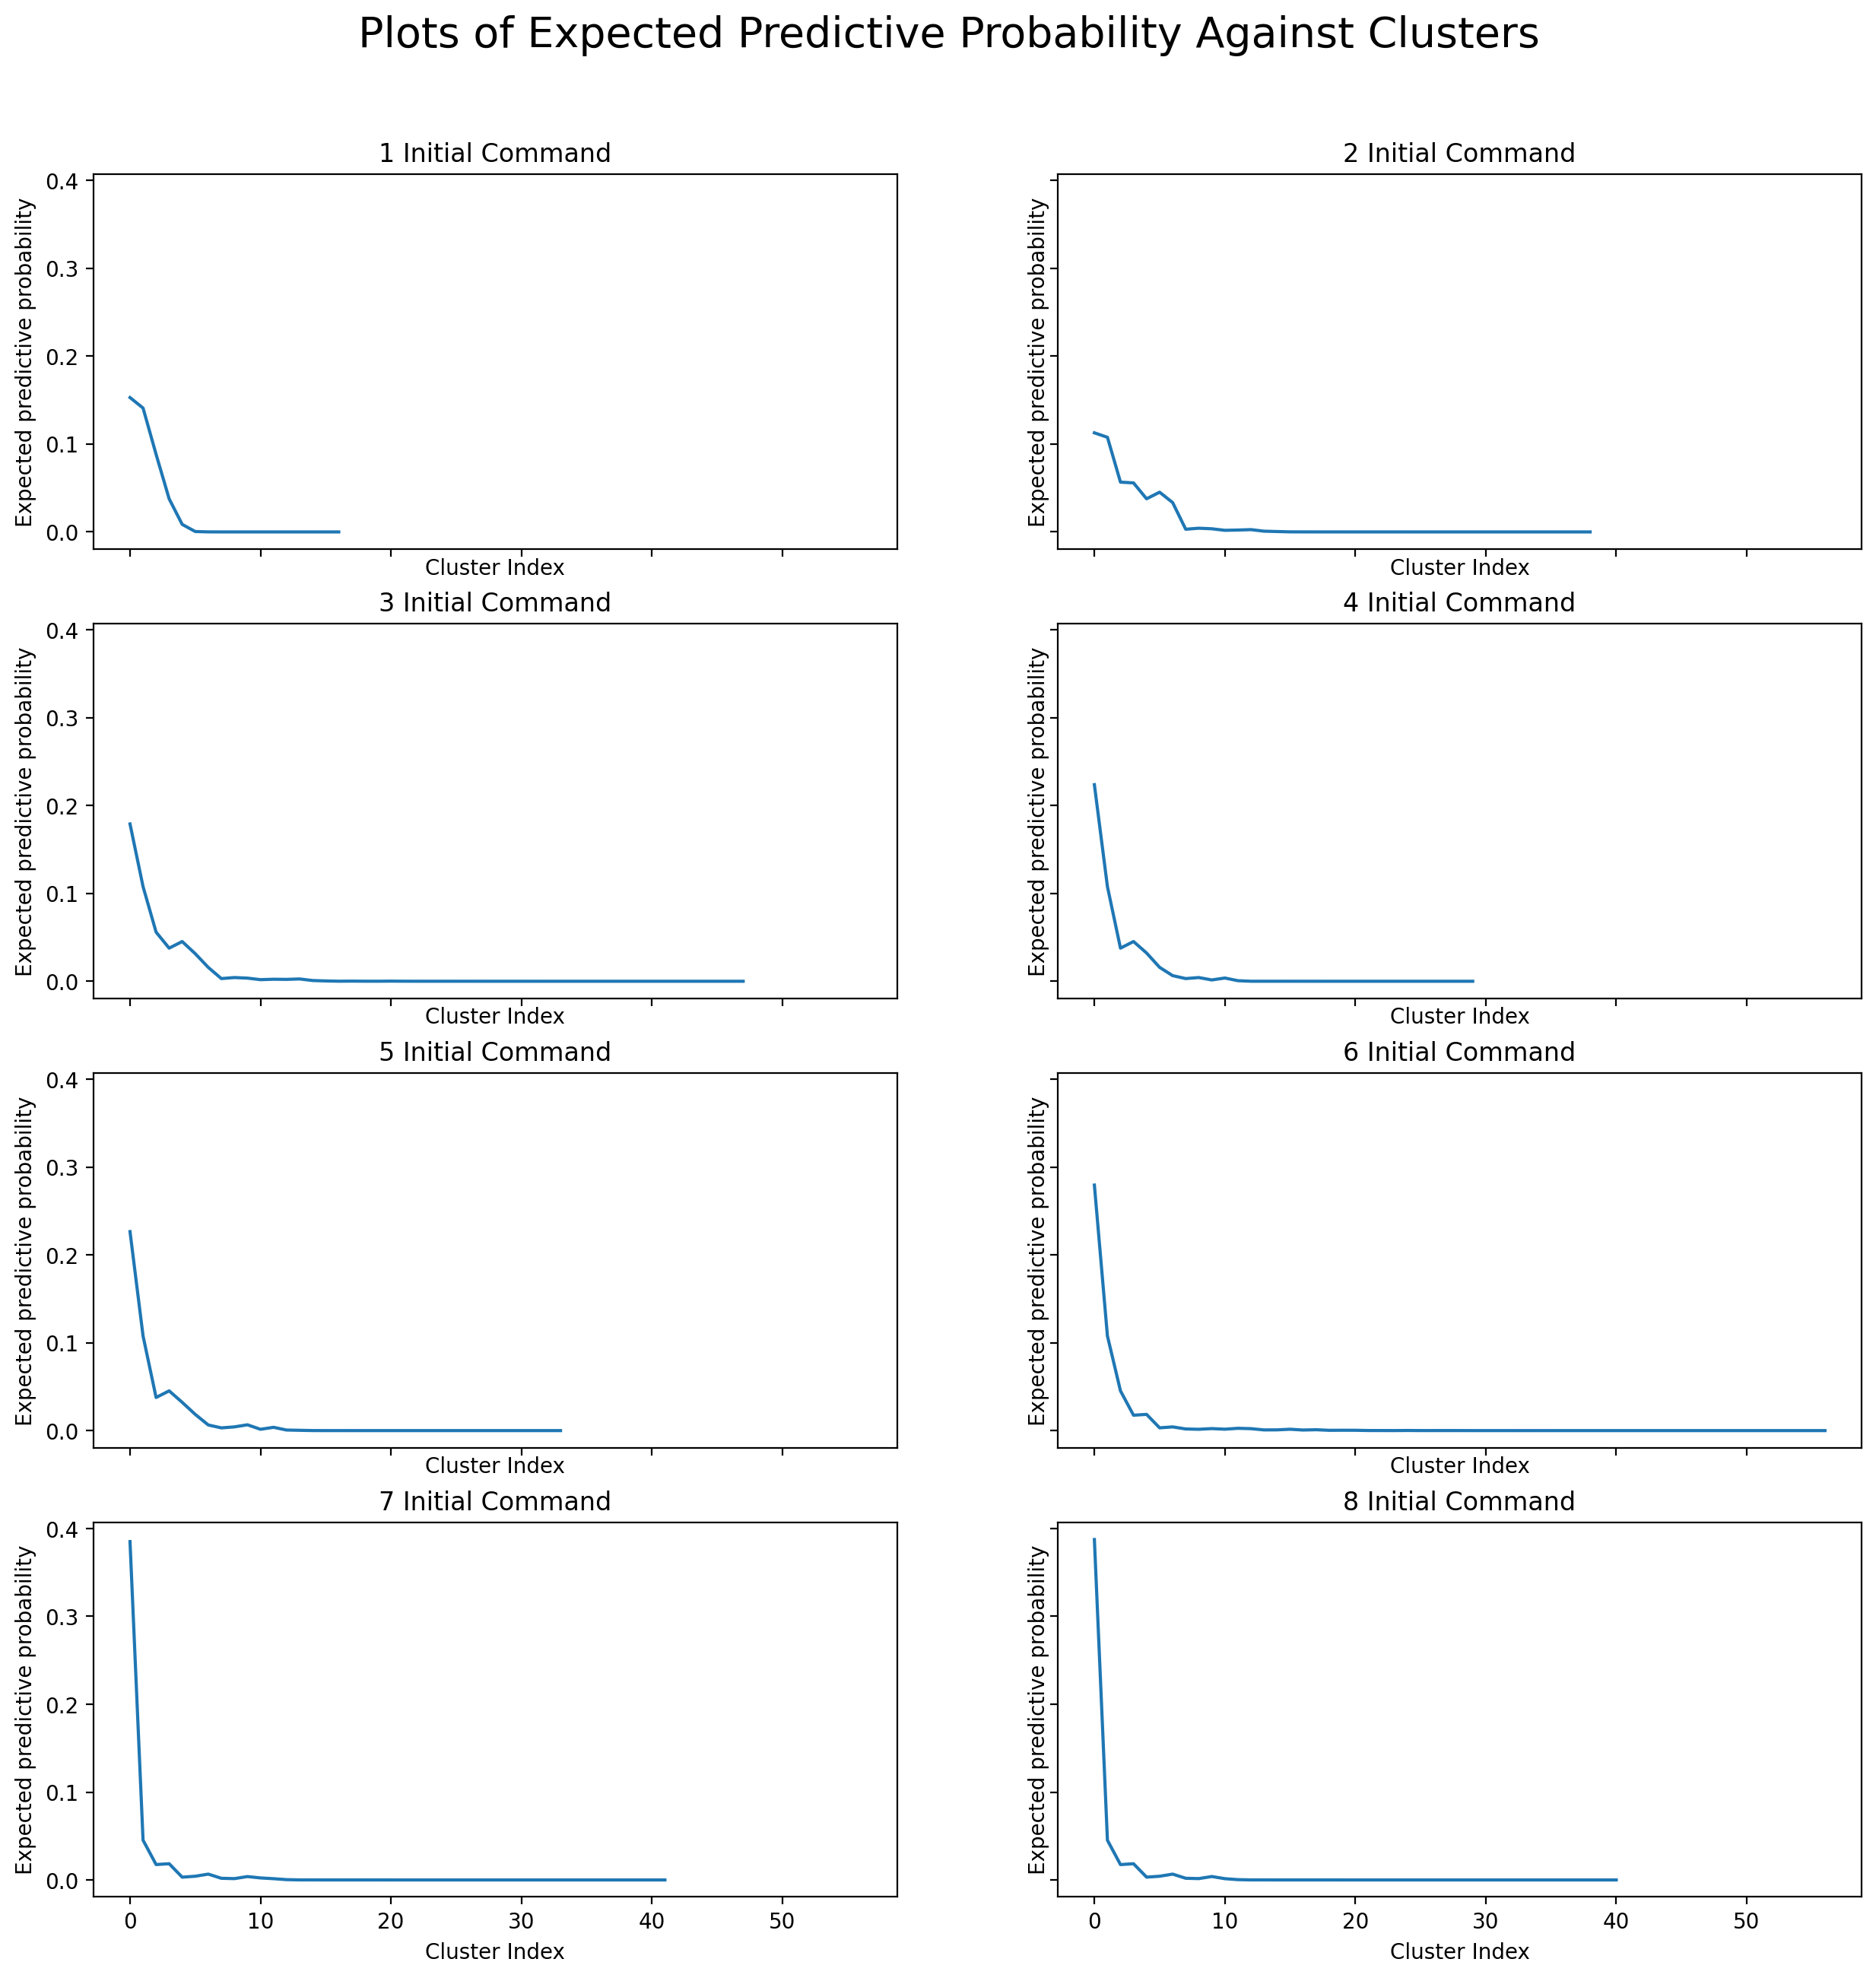

In [11]:
fig, ax = plt.subplots(4, 2, figsize=(15,15), dpi=200, sharex=True, sharey=True)
for init_commands_num in range(1, 9):
    y = ys[init_commands_num-1]
    sns.lineplot(x = [i for i in range(len(y))], y = y,ax=ax[(init_commands_num-1)//2, (init_commands_num-1)%2])
    ax[(init_commands_num-1)//2, (init_commands_num-1)%2].set(title='{} Initial Command'.format(init_commands_num),
                                                              xlabel='Cluster Index',
                                                              ylabel='Expected predictive probability'
                                                             )
    fig.suptitle('Plots of Expected Predictive Probability Against Clusters',\
                 y = 0.95, fontsize=20
                )
plt.show()

In [3]:
init_commands_num = 8
with open('agg_data/aggclustering_{}init_optimct.pkl'.format(init_commands_num), 'rb') as f:
    _, optim_memory = pickle.load(f)

In [4]:
weights = optim_memory['weights']
sorted_cw = sorted(weights.items(), key=lambda item: item[1], reverse=True)
sorted_c = [cw[0] for cw in sorted_cw]
sorted_w = [cw[1] for cw in sorted_cw]

In [7]:
sorted_c[0]

(('linuxshell',
  'sh',
  'shell',
  'enable',
  'system',
  '/bin/busybox TAMEE',
  '/bin/busybox ps -A; /bin/busybox TAMEE',
  '/bin/busybox cat /proc/1/exe'),
 ('enable',
  'shell',
  'sh',
  '/bin/busybox iDdosYou',
  '/bin/busybox ps; /bin/busybox iDdosYou',
  '/bin/busybox cat /proc/mounts; /bin/busybox iDdosYou',
  "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon",
  "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"),
 ('sh',
  'linuxshell',
  'bah',
  '/bin/busybox Ex0',
  '/bin/busybox ps; /bin/busybox Ex0',
  '/bin/busybox cat /proc/mounts; /bin/busybox Ex0',
  "/bin/busybox echo -e '\\x45\\x78\\x30\\x31' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon",
  "/bin/busybox echo -e '\\x45\\x78\\x30\\x31/dev' > /dev/.nippon; /bin/busybox cat /dev/.nippon; /bin/busybox rm /dev/.nippon"),
 ('enable',
  'shell',
  'sh',
  'linuxshell'

In [6]:
sorted_w

[93097,
 10664,
 4273,
 2305,
 1374,
 1124,
 1077,
 839,
 799,
 693,
 555,
 123,
 47,
 45,
 36,
 27,
 25,
 19,
 15,
 7,
 4,
 3,
 3,
 3,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [8]:
init_commands_num = 4
with open('agg_data/aggclustering_{}init_optimct.pkl'.format(init_commands_num), 'rb') as f:
    _, optim_memory = pickle.load(f)
weights = optim_memory['weights']
sorted_cw = sorted(weights.items(), key=lambda item: item[1], reverse=True)
sorted_c = [cw[0] for cw in sorted_cw]
sorted_w = [cw[1] for cw in sorted_cw]

In [9]:
sorted_c[0]

(('sh',
  '/bin/busybox iDdosYou',
  '/bin/busybox ps; /bin/busybox iDdosYou',
  '/bin/busybox cat /proc/mounts; /bin/busybox iDdosYou'),
 ('sh',
  '>/tmp/.ptmx && cd /tmp/',
  '>/var/.ptmx && cd /var/',
  '>/dev/.ptmx && cd /dev/'),
 ('enable', 'shell', 'sh', '/bin/busybox iDdosYou'),
 ('sh',
  '/bin/busybox LOLKEK',
  '/bin/busybox ps; /bin/busybox LOLKEK',
  '/bin/busybox cat /proc/mounts; /bin/busybox LOLKEK'),
 ('enable', 'shell', 'sh', '/bin/busybox LOLKEK'),
 ('shell', 'sh', '>/tmp/.ptmx && cd /tmp/', '>/var/.ptmx && cd /var/'),
 ('linuxshell',
  '/bin/busybox TAMEE',
  '/bin/busybox cat /proc/mounts; /bin/busybox TAMEE',
  "/bin/busybox echo -e '\\x6b\\x61\\x6d\\x69' > /.nippon; /bin/busybox cat /.nippon; /bin/busybox rm /.nippon"),
 ('sh', 'shell', 'enable', 'system'),
 ('sh',
  '/bin/busybox OWARI',
  '/bin/busybox ps; /bin/busybox OWARI',
  '/bin/busybox cat /proc/mounts; /bin/busybox OWARI'),
 ('sh',
  '/bin/busybox TELNET',
  '/bin/busybox ps; /bin/busybox TELNET',
  '/bin

In [10]:
sorted_w

[56183,
 21785,
 11633,
 10664,
 7931,
 2773,
 1557,
 1469,
 1124,
 825,
 743,
 322,
 32,
 28,
 27,
 25,
 19,
 15,
 4,
 3,
 3,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1]